In [75]:
!pip install -U pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
D:\Data_Analytic\Homework\virtual_environment\Scripts\python.exe -m pip install -U pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

In [2]:
!pip install prophet


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [4]:
!pip install ipywidgets


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from prophet import Prophet

In [6]:
import matplotlib.pyplot as plt

### Model 1
00000386   Муфта эластичная карданного вала ("джуба") для а/м ВАЗ-2101-07, 2121/31

In [7]:
df = pd.read_csv('Для прогнозирования_model1.csv', sep=';')
df.shape

(364, 3)

In [8]:
df.head(5)

,Код,Дата,Расход
0,386,23.06.2024 0:00:00,5
1,386,22.06.2024 0:00:00,303
2,386,21.06.2024 0:00:00,19
3,386,20.06.2024 0:00:00,67
4,386,19.06.2024 0:00:00,32


In [9]:
df_m1 = df.iloc[::-1].reset_index(drop=True)

In [10]:
df_m1.head(5)

,Код,Дата,Расход
0,386,26.06.2023 0:00:00,0
1,386,27.06.2023 0:00:00,13
2,386,28.06.2023 0:00:00,97
3,386,29.06.2023 0:00:00,0
4,386,30.06.2023 0:00:00,10


In [11]:
df_m1.dtypes

Код        int64
Дата      object
Расход     int64
dtype: object

In [12]:
df_m1['Дата'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y %H:%M:%S')
df_m1.dtypes

Код                int64
Дата      datetime64[ns]
Расход             int64
dtype: object

In [13]:
df_m1.drop(df_m1.columns[0], axis = 1, inplace = True)

In [14]:
df_m1.dtypes

Дата      datetime64[ns]
Расход             int64
dtype: object

In [15]:
df_m1.rename(columns={'Дата': 'ds', 'Расход': 'y'}, inplace=True)

In [16]:
model = Prophet()
model.fit(df_m1)

20:03:06 - cmdstanpy - INFO - Chain [1] start processing
20:03:06 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future_period = model.make_future_dataframe(periods=14)
forecast_14days = model.predict(future_period)

D:\Data_Analytic\Homework\virtual_environment\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\Data_Analytic\Homework\virtual_environment\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


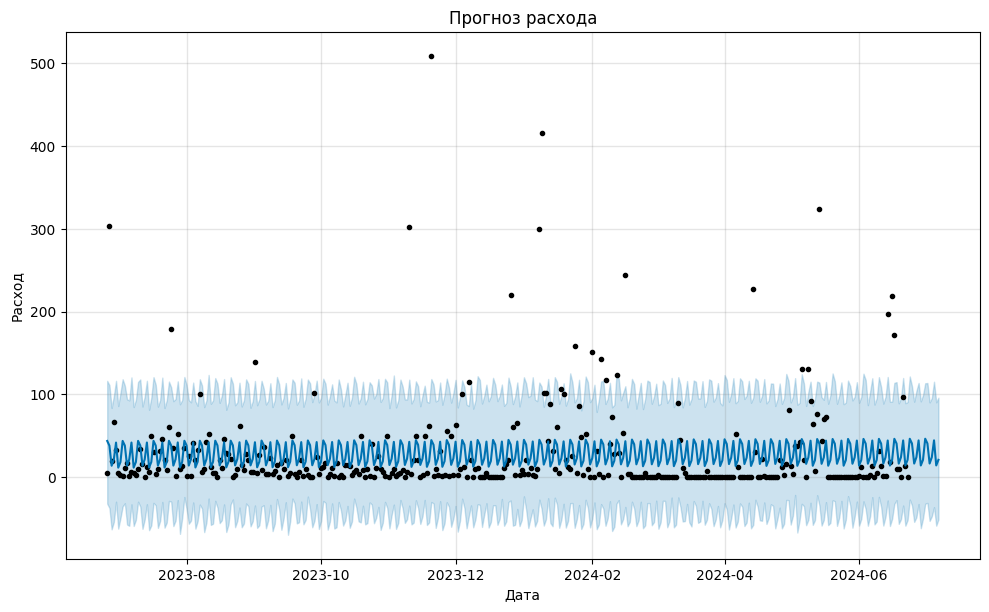

In [18]:
fig = model.plot(forecast_14days)
plt.title('Прогноз расхода')
plt.xlabel('Дата')
plt.ylabel('Расход')
plt.savefig('Прогноз_Prophet_деталь_00000386.png')

In [19]:
print(forecast_14days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14))

            ds       yhat  yhat_lower  yhat_upper
364 2024-06-24  46.126035  -27.418913  121.461428
365 2024-06-25  40.427222  -34.442518  109.837296
366 2024-06-26  16.131780  -54.395496   90.975393
367 2024-06-27  23.774014  -48.872703  103.856371
368 2024-06-28  44.160522  -32.805188  113.586623
369 2024-06-29  13.820163  -62.046702   91.343475
370 2024-06-30  20.596045  -50.394174   99.015668
371 2024-07-01  46.178051  -32.441972  113.221127
372 2024-07-02  40.479238  -31.465159  113.543839
373 2024-07-03  16.183796  -53.195177   90.149708
374 2024-07-04  23.826030  -47.651138   95.293632
375 2024-07-05  44.212537  -36.599367  115.110724
376 2024-07-06  13.872179  -58.967083   90.195732
377 2024-07-07  20.648061  -51.381697   95.820869


### Model 2
00000651   Втулка шпильки клапанной крышки для а/м ВАЗ-2108-099; 1118 Kalina; 2190 Granta

In [20]:
df_m2 = pd.read_csv('Для прогнозирования_model2.csv', sep=';')
df_m2.shape

(364, 3)

In [21]:
df_m2.head(5)

,Код,Дата,Расход
0,651,26.06.2023 0:00:00,232
1,651,27.06.2023 0:00:00,154
2,651,28.06.2023 0:00:00,586
3,651,29.06.2023 0:00:00,82
4,651,30.06.2023 0:00:00,0


In [22]:
df_m2.dtypes

Код        int64
Дата      object
Расход     int64
dtype: object

In [23]:
df_m2['Дата'] = pd.to_datetime(df_m2['Дата'], format='%d.%m.%Y %H:%M:%S')
df_m2.drop(df_m2.columns[0], axis = 1, inplace = True)
df_m2.dtypes

Дата      datetime64[ns]
Расход             int64
dtype: object

In [24]:
df_m2.head(5)

,Дата,Расход
0,2023-06-26,232
1,2023-06-27,154
2,2023-06-28,586
3,2023-06-29,82
4,2023-06-30,0


In [25]:
df_m2.rename(columns={'Дата': 'ds', 'Расход': 'y'}, inplace=True)

In [26]:
model = Prophet()
model.fit(df_m2)

20:03:07 - cmdstanpy - INFO - Chain [1] start processing
20:03:08 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future_period = model.make_future_dataframe(periods=14)
forecast_14days = model.predict(future_period)

D:\Data_Analytic\Homework\virtual_environment\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\Data_Analytic\Homework\virtual_environment\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


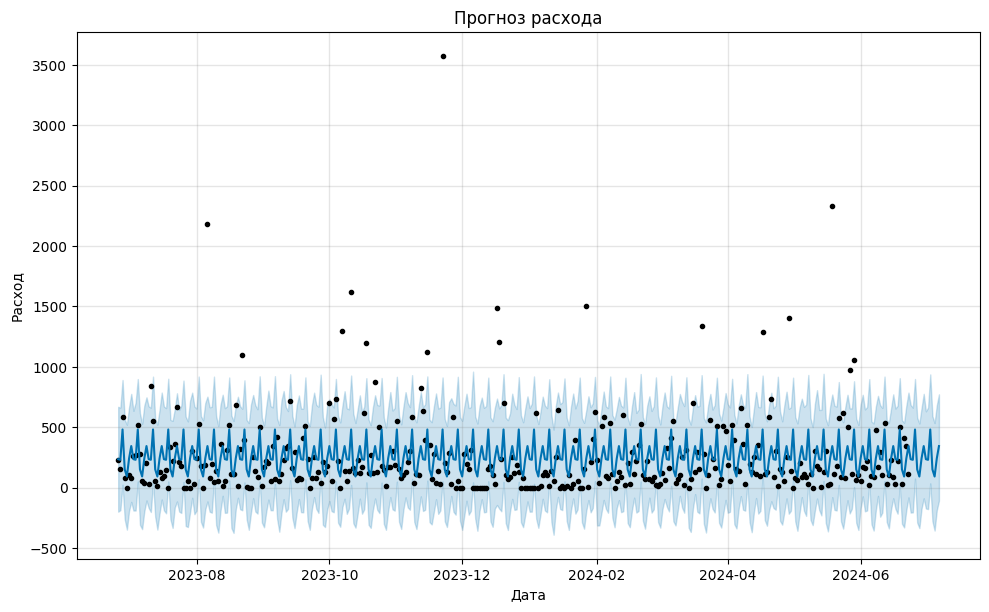

In [28]:
fig = model.plot(forecast_14days)
plt.title('Прогноз расхода')
plt.xlabel('Дата')
plt.ylabel('Расход')
plt.savefig('Прогноз_Prophet_деталь_00000651.png')

In [29]:
print(forecast_14days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14))

            ds        yhat  yhat_lower  yhat_upper
364 2024-06-24  234.548912 -207.691162  683.798711
365 2024-06-25  229.329589 -205.986196  661.495873
366 2024-06-26  480.663117   73.744947  898.603161
367 2024-06-27  149.878187 -290.051803  578.158484
368 2024-06-28   91.010440 -336.204385  530.223972
369 2024-06-29  240.506986 -175.136407  657.886106
370 2024-06-30  343.046740  -89.634763  775.863554
371 2024-07-01  234.544435 -173.938806  631.102613
372 2024-07-02  229.325112 -178.695064  661.968645
373 2024-07-03  480.658639   34.296575  936.724354
374 2024-07-04  149.873710 -279.323094  591.165069
375 2024-07-05   91.005963 -356.599625  533.962792
376 2024-07-06  240.502508 -188.813751  680.603900
377 2024-07-07  343.042263 -108.924382  771.829527


### Model 3
00000947   Подушка (втулка) крепления верхнего конца заднего амортизатора для а/м ВАЗ-2110-12, 2113-2115, 1118

In [30]:
df_m3 = pd.read_csv('Для прогнозирования_model3.csv', sep=';')
df_m3.shape

(364, 3)

In [31]:
df_m3.head(5)

,Код,Дата,Расход
0,947,26.06.2023 0:00:00,290
1,947,27.06.2023 0:00:00,530
2,947,28.06.2023 0:00:00,66
3,947,29.06.2023 0:00:00,587
4,947,30.06.2023 0:00:00,211


In [32]:
df_m3.dtypes

Код        int64
Дата      object
Расход     int64
dtype: object

In [33]:
df_m3['Дата'] = pd.to_datetime(df_m3['Дата'], format='%d.%m.%Y %H:%M:%S')
df_m3.drop(df_m3.columns[0], axis = 1, inplace = True)

In [34]:
df_m3.rename(columns={'Дата': 'ds', 'Расход': 'y'}, inplace=True)

In [35]:
model = Prophet()
model.fit(df_m3)

20:03:09 - cmdstanpy - INFO - Chain [1] start processing
20:03:09 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
future_period = model.make_future_dataframe(periods=14)
forecast_14days = model.predict(future_period)

D:\Data_Analytic\Homework\virtual_environment\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\Data_Analytic\Homework\virtual_environment\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


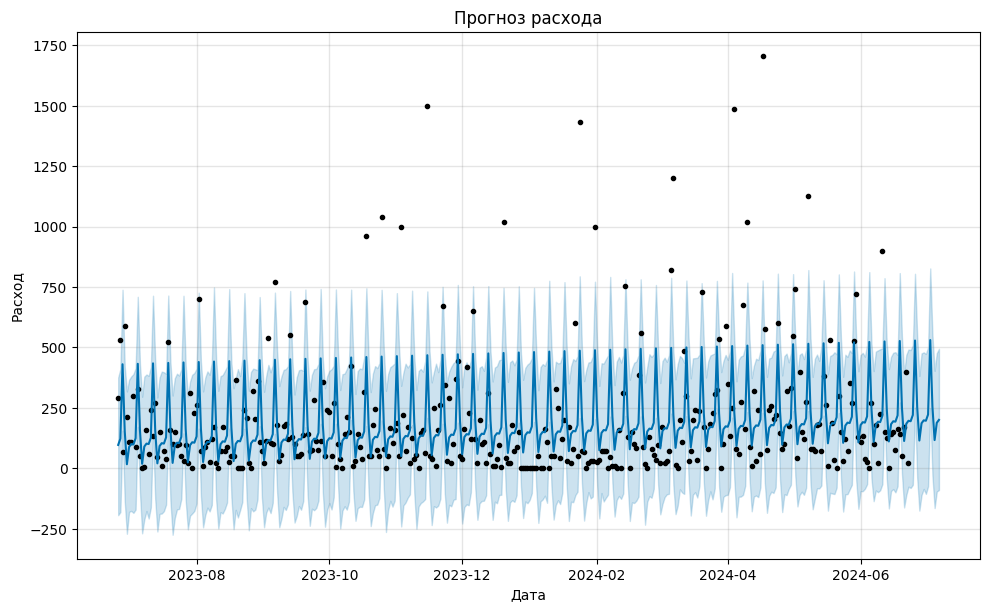

In [37]:
fig = model.plot(forecast_14days)
plt.title('Прогноз расхода')
plt.xlabel('Дата')
plt.ylabel('Расход')
plt.savefig('Прогноз_Prophet_деталь_00000947.png')

In [38]:
print(forecast_14days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14))

            ds        yhat  yhat_lower  yhat_upper
364 2024-06-24  194.969788  -81.267229  489.251409
365 2024-06-25  220.735478  -68.097364  508.712707
366 2024-06-26  528.744070  250.940941  804.776302
367 2024-06-27  252.613501  -38.355673  546.020532
368 2024-06-28  115.037167 -174.961700  381.971655
369 2024-06-29  186.455537 -110.495155  475.534723
370 2024-06-30  198.548523  -85.335660  479.990088
371 2024-07-01  196.875605 -105.673585  473.425899
372 2024-07-02  222.641295  -74.572543  500.301608
373 2024-07-03  530.649887  248.271311  826.954660
374 2024-07-04  254.519318  -30.538115  552.574423
375 2024-07-05  116.942984 -164.545866  403.228932
376 2024-07-06  188.361354  -95.981312  476.350526
377 2024-07-07  200.454341  -89.834980  494.444114


### Model 4
00002108   Втулки реактивных штанг задней подвески для а/м ВАЗ-2101-07, 2121/31, 2123 (Комплект: 2101-2919042-1

In [39]:
df_m4 = pd.read_csv('Для прогнозирования_model4.csv', sep=';')
df_m4.shape

(364, 3)

In [40]:
df_m4.head(5)

,Код,Дата,Расход
0,2108,26.06.2023 0:00:00,5
1,2108,27.06.2023 0:00:00,23
2,2108,28.06.2023 0:00:00,24
3,2108,29.06.2023 0:00:00,2
4,2108,30.06.2023 0:00:00,11


In [41]:
df_m4.dtypes

Код        int64
Дата      object
Расход     int64
dtype: object

In [42]:
df_m4['Дата'] = pd.to_datetime(df_m4['Дата'], format='%d.%m.%Y %H:%M:%S')
df_m4.drop(df_m4.columns[0], axis = 1, inplace = True)

In [43]:
df_m4.rename(columns={'Дата': 'ds', 'Расход': 'y'}, inplace=True)

In [44]:
model = Prophet()
model.fit(df_m4)

20:03:11 - cmdstanpy - INFO - Chain [1] start processing
20:03:11 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future_period = model.make_future_dataframe(periods=14)
forecast_14days = model.predict(future_period)

D:\Data_Analytic\Homework\virtual_environment\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\Data_Analytic\Homework\virtual_environment\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


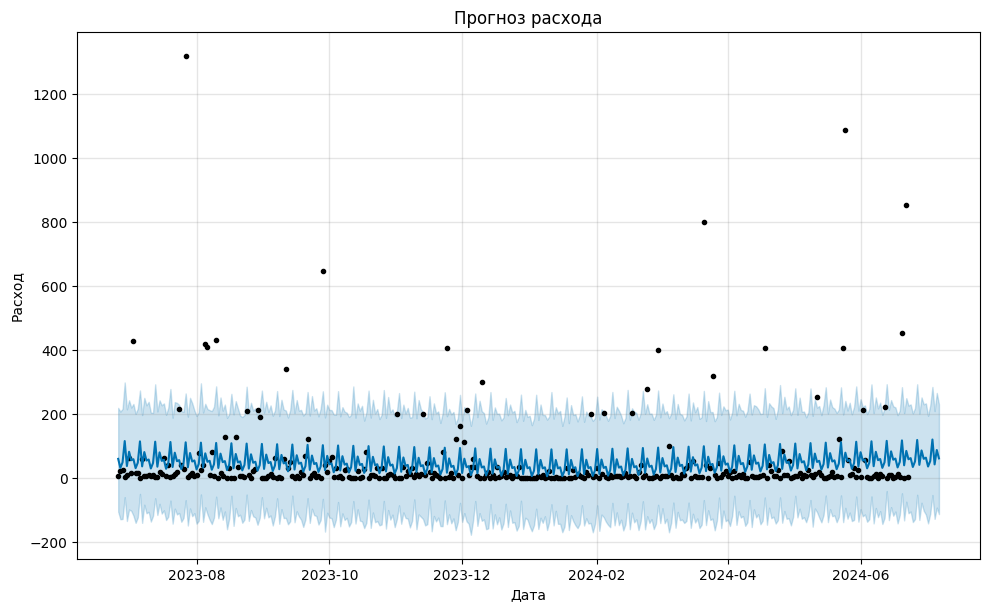

In [46]:
fig = model.plot(forecast_14days)
plt.title('Прогноз расхода')
plt.xlabel('Дата')
plt.ylabel('Расход')
plt.savefig('Прогноз_Prophet_деталь_00002108.png')

In [47]:
print(forecast_14days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14))

            ds        yhat  yhat_lower  yhat_upper
364 2024-06-24   62.476462 -104.471193  230.387850
365 2024-06-25   34.749051 -137.501702  202.382728
366 2024-06-26   52.141474 -128.096709  218.682264
367 2024-06-27  119.204040  -52.171047  293.422187
368 2024-06-28   41.379200 -130.987797  201.462725
369 2024-06-29   86.466739  -77.040338  252.294523
370 2024-06-30   60.238535 -102.368191  230.778460
371 2024-07-01   63.876849 -114.051131  233.639945
372 2024-07-02   36.149438 -141.720576  194.874017
373 2024-07-03   53.541860 -111.183586  227.434902
374 2024-07-04  120.604427  -52.974857  285.035572
375 2024-07-05   42.779587 -127.591686  209.484164
376 2024-07-06   87.867126  -92.331915  266.295952
377 2024-07-07   61.638921 -112.800235  231.163602


### Model 5
00002110   Подушки (Втулки) крепления задних Амортизаторов для а/м ВАЗ-2101-07, 2121/31 (Комплект 2101-2906231

In [48]:
df_m5 = pd.read_csv('Для прогнозирования_model5.csv', sep=';')
df_m5.shape

(364, 3)

In [49]:
df_m5.head(5)

,Код,Дата,Расход
0,2110,26.06.2023 0:00:00,23
1,2110,27.06.2023 0:00:00,69
2,2110,28.06.2023 0:00:00,88
3,2110,29.06.2023 0:00:00,16
4,2110,30.06.2023 0:00:00,18


In [50]:
df_m5.dtypes

Код        int64
Дата      object
Расход     int64
dtype: object

In [51]:
df_m5['Дата'] = pd.to_datetime(df_m5['Дата'], format='%d.%m.%Y %H:%M:%S')
df_m5.drop(df_m5.columns[0], axis = 1, inplace = True)

In [52]:
df_m5.rename(columns={'Дата': 'ds', 'Расход': 'y'}, inplace=True)

In [53]:
model = Prophet()
model.fit(df_m5)

20:03:12 - cmdstanpy - INFO - Chain [1] start processing
20:03:13 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
future_period = model.make_future_dataframe(periods=14)
forecast_14days = model.predict(future_period)

D:\Data_Analytic\Homework\virtual_environment\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\Data_Analytic\Homework\virtual_environment\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


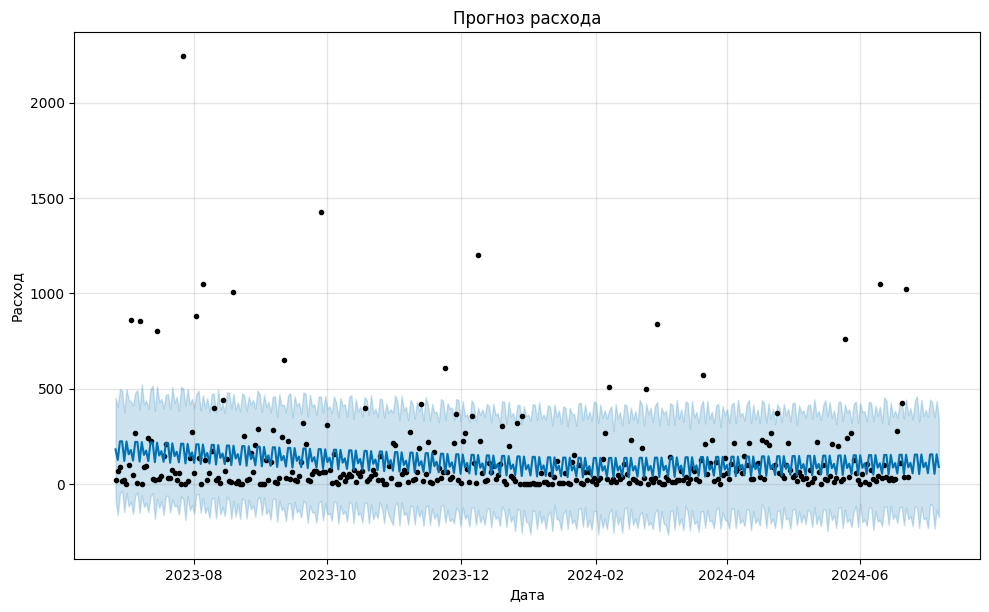

In [55]:
fig = model.plot(forecast_14days)
plt.title('Прогноз расхода')
plt.xlabel('Дата')
plt.ylabel('Расход')
plt.savefig('Прогноз_Prophet_деталь_00002110.png')

In [56]:
print(forecast_14days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14))

            ds        yhat  yhat_lower  yhat_upper
364 2024-06-24  110.236290 -168.895543  397.674624
365 2024-06-25   55.214620 -223.388657  338.419101
366 2024-06-26  153.623214 -115.535625  435.750585
367 2024-06-27  154.123968 -126.920012  460.552073
368 2024-06-28   51.660383 -231.259012  328.114832
369 2024-06-29  154.254710 -120.092294  441.465679
370 2024-06-30   87.750395 -186.146205  355.409608
371 2024-07-01  111.182035 -177.159871  388.789343
372 2024-07-02   56.160365 -233.283563  351.877634
373 2024-07-03  154.568959 -106.436120  442.778606
374 2024-07-04  155.069713 -111.437690  427.076676
375 2024-07-05   52.606128 -234.984200  348.712153
376 2024-07-06  155.200455 -135.151512  435.437231
377 2024-07-07   88.696140 -175.045488  339.394437


### Model 6
00002114   Подушки (втулки) штанг переднего стабилизатора для а/м ВАЗ-2101-07 (Комплект 2101-2906040 - 4 шт)

In [57]:
df_m6 = pd.read_csv('Для прогнозирования_model6.csv', sep=';')
df_m6.shape

(364, 3)

In [58]:
df_m6.head(5)

,Код,Дата,Расход
0,2114,26.06.2023 0:00:00,138
1,2114,27.06.2023 0:00:00,80
2,2114,28.06.2023 0:00:00,50
3,2114,29.06.2023 0:00:00,29
4,2114,30.06.2023 0:00:00,20


In [59]:
df_m6.dtypes

Код        int64
Дата      object
Расход     int64
dtype: object

In [60]:
df_m6['Дата'] = pd.to_datetime(df_m6['Дата'], format='%d.%m.%Y %H:%M:%S')
df_m6.drop(df_m6.columns[0], axis = 1, inplace = True)

In [61]:
df_m6.rename(columns={'Дата': 'ds', 'Расход': 'y'}, inplace=True)

In [62]:
model = Prophet()
model.fit(df_m6)

20:03:14 - cmdstanpy - INFO - Chain [1] start processing
20:03:14 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
future_period = model.make_future_dataframe(periods=14)
forecast_14days = model.predict(future_period)

D:\Data_Analytic\Homework\virtual_environment\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\Data_Analytic\Homework\virtual_environment\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


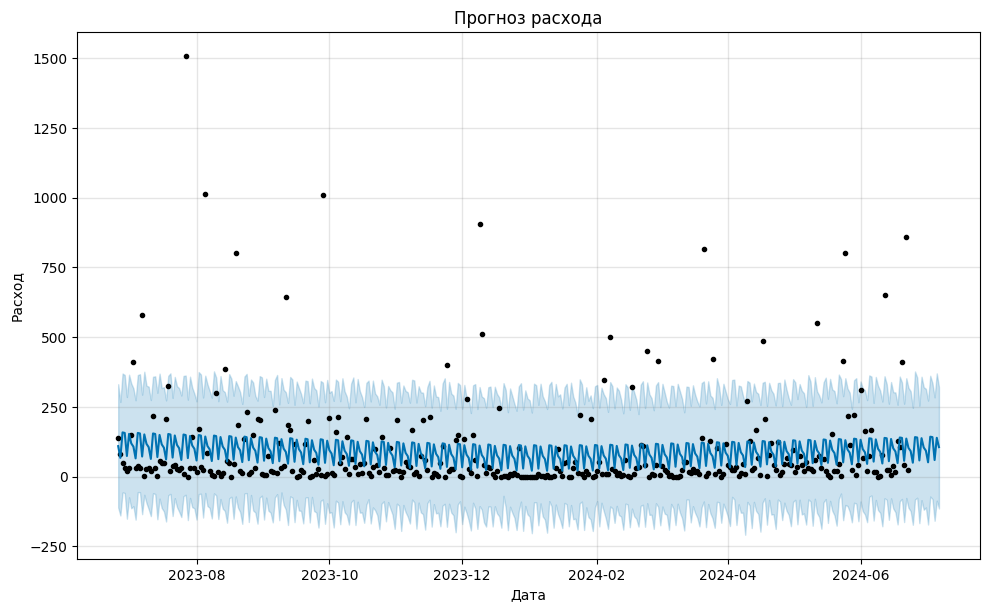

In [64]:
fig = model.plot(forecast_14days)
plt.title('Прогноз расхода')
plt.xlabel('Дата')
plt.ylabel('Расход')
plt.savefig('Прогноз_Prophet_деталь_00002114.png')

In [65]:
print(forecast_14days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14))

            ds        yhat  yhat_lower  yhat_upper
364 2024-06-24   91.194790 -123.927639  305.830370
365 2024-06-25   49.617174 -172.920408  246.212882
366 2024-06-26  141.378875  -82.374967  376.686984
367 2024-06-27  139.941220  -75.983012  355.419804
368 2024-06-28   57.716832 -167.184688  254.143116
369 2024-06-29  137.407402  -84.635580  357.895084
370 2024-06-30  104.029143 -119.052688  320.418593
371 2024-07-01   92.608660 -111.006456  314.488035
372 2024-07-02   51.031043 -172.013984  272.238805
373 2024-07-03  142.792745  -71.637810  361.359653
374 2024-07-04  141.355090  -80.826797  335.282205
375 2024-07-05   59.130702 -158.662659  283.865843
376 2024-07-06  138.821272  -86.642744  369.878875
377 2024-07-07  105.443013 -114.519537  321.153855


### Model 7
00024731   Муфта эластичная карданного вала ("джуба") для а/м ВАЗ-2101-07, 2121/31; упаковка карт.коробка

In [66]:
df_m7 = pd.read_csv('Для прогнозирования_model7.csv', sep=';')
df_m7.shape

(202, 3)

In [67]:
df_m7.head(5)

,Код,Дата,Расход
0,24731,27.06.2023 0:00:00,24
1,24731,28.06.2023 0:00:00,29
2,24731,29.06.2023 0:00:00,0
3,24731,30.06.2023 0:00:00,0
4,24731,01.07.2023 0:00:00,1


In [68]:
df_m7.dtypes

Код        int64
Дата      object
Расход     int64
dtype: object

In [69]:
df_m7['Дата'] = pd.to_datetime(df_m7['Дата'], format='%d.%m.%Y %H:%M:%S')
df_m7.drop(df_m7.columns[0], axis = 1, inplace = True)

In [70]:
df_m7.rename(columns={'Дата': 'ds', 'Расход': 'y'}, inplace=True)

In [71]:
model = Prophet()
model.fit(df_m7)

20:03:16 - cmdstanpy - INFO - Chain [1] start processing
20:03:16 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
future_period = model.make_future_dataframe(periods=14)
forecast_14days = model.predict(future_period)

D:\Data_Analytic\Homework\virtual_environment\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\Data_Analytic\Homework\virtual_environment\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


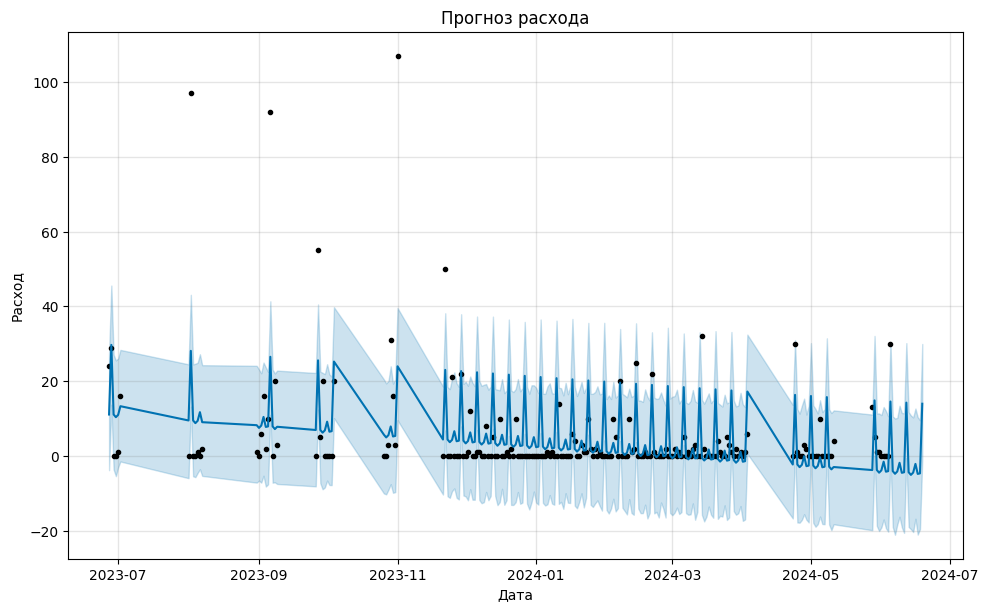

In [73]:
fig = model.plot(forecast_14days)
plt.title('Прогноз расхода')
plt.xlabel('Дата')
plt.ylabel('Расход')
plt.savefig('Прогноз_Prophet_деталь_00024731.png')

In [74]:
print(forecast_14days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14))

            ds       yhat  yhat_lower  yhat_upper
202 2024-06-06  -4.034665  -18.978717   10.600938
203 2024-06-07  -4.755999  -21.067790   10.032831
204 2024-06-08  -4.133530  -18.330656   10.181187
205 2024-06-09  -1.812390  -16.248056   13.438577
206 2024-06-10  -4.493404  -19.052064   11.509363
207 2024-06-11  -4.348638  -20.561866   11.427697
208 2024-06-12  14.278924   -0.547353   30.192037
209 2024-06-13  -4.330991  -18.990090   11.738359
210 2024-06-14  -5.052325  -19.543266   10.840798
211 2024-06-15  -4.429856  -20.332919   10.322730
212 2024-06-16  -2.108716  -16.774946   12.699317
213 2024-06-17  -4.789730  -21.026122   10.381212
214 2024-06-18  -4.644964  -19.562724    9.571165
215 2024-06-19  13.982598   -1.052108   29.965920
